# Network Science - UDD
## Centralidad y Mundo Pequeño


#### Cristian Candia-Castro Vallejos, Ph.D.$^{1,2}$

- [1] Data Science Institute (IDS), Universidad del Desarrollo,Chile
- [2] Northwestern Institute on Complex Systems, Kellogg School of Management, Northwestern Unviersity, USA


Referencias:
1. https://publish.illinois.edu/pynetworkshop/
2. https://github.com/MridulS/pydata-networkx



### Redes? Grafos?

Una estructura matemática utilizada para modelar relaciones por pares entre objetos, donde los objetos generalmente se denominan `nodos` y la relación entre ellos `enlaces`.

$G = (V, E)$

$V$ = conjunto de nodos/vértices

$E$ = conjunto de $(x, y)$ enlaces

In [ ]:
###Si `nx.erdos_renyi_graph` arroja el error random_state_index is incorrect, intentar:

# import decorator

In [ ]:
# print(decorator.__version__)

In [ ]:
# ! pip install decorator==5.0.9 #, 5.1.0

In [ ]:
####Luego reiniciar Jupyter y correr:

# ! pip install networkx

In [3]:
# Module 1: Comenzando con NetworkX

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import collections

import networkx as nx

%matplotlib inline

import urllib.request as urllib
import io

# path = 'https://saref.github.io/teaching/PyNetworkshop/'

In [3]:
G_rand=nx.erdos_renyi_graph(14, .01)

In [4]:
type(G_rand)

networkx.classes.graph.Graph

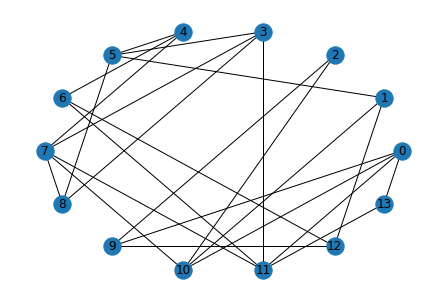

In [5]:
nx.draw_circular(nx.erdos_renyi_graph(14, 0.2), with_labels=True)

### ¿Ejemplos de redes?

¿Puedes pensar en algunas redes del mundo real?

### Usando `NetworkX`

In [56]:
# Creating a graph/network object
G = nx.Graph()

In [57]:
# accessing nodes
G.nodes()

NodeView(())

In [58]:
# accessing edges
G.edges()

EdgeView([])

In [59]:
# Creemos una red de recetas

# G.add_node('Tomato')
# G.add_node('Eggs')
# G.add_node('Lamb')
# G.add_node('Chicken')
G.add_nodes_from(['Tomato', 'Eggs', 'Lamb', 'Chicken'])

In [60]:
# G.add_edge('Tomato', 'Eggs')
# G.add_edge('Lamb', 'Tomato')
# G.add_edge('Chicken', 'Tomato')
G.add_edges_from([('Tomato', 'Eggs'), ('Tomato', 'Lamb'), ('Tomato', 'Chicken')])

In [61]:
G.nodes()
#list(G.nodes())

NodeView(('Tomato', 'Eggs', 'Lamb', 'Chicken'))

In [62]:
G.edges()

EdgeView([('Tomato', 'Eggs'), ('Tomato', 'Lamb'), ('Tomato', 'Chicken')])

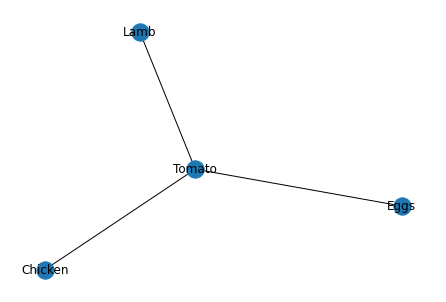

In [63]:
nx.draw(G, with_labels=True)

In [66]:
# cualquier objeto "hasheable" puede ser un nodo en la red
G.add_node([1, 2])

TypeError: unhashable type: 'list'

En Python, cualquier objeto inmutable (como un número entero, booleano, cadena, tupla) es hash, lo que significa que su valor no cambia durante su vida útil.

Creemos un grafo que se parezca al siguiente:

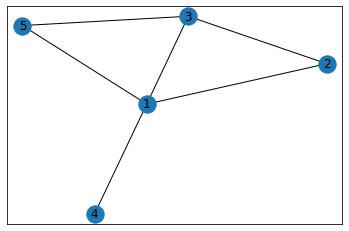

In [69]:
# Los datos de una red se pueden representar como un edgelist, una matriz o un grafo

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edges_from([(1, 2), (2,1), (2, 3), (1,3), (1,4), (1,5), (3,5)])# 7 tuplas

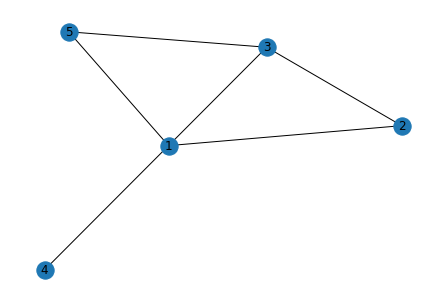

In [76]:
nx.draw(G, with_labels=True)

In [77]:
G.number_of_nodes()

5

In [78]:
G.number_of_edges() # observe que 1,2 y 2,1 cuentan como 1 enlace. Ya que este es un grafo no-dirigido

6

In [79]:
list(G.nodes)

[1, 2, 3, 4, 5]

In [80]:
list(G.edges)

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (3, 5)]

In [81]:
#remueve nodos
G.remove_node(1) # take notice that once you remove node 1, all edges linked with 1 will be removed as well.

In [82]:
list(G.nodes)

[2, 3, 4, 5]

In [83]:
list(G.edges)

[(2, 3), (3, 5)]

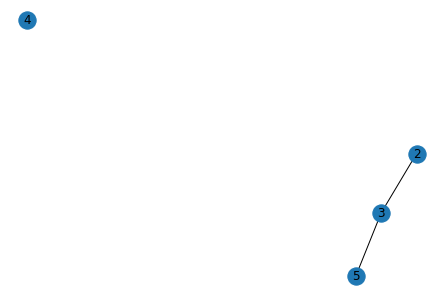

In [84]:
nx.draw(G, with_labels=True)

In [85]:
#remueve enlaces
G.remove_edge(3,5) # remove edge from 3 to 5 

In [86]:
list(G.edges)

[(2, 3)]

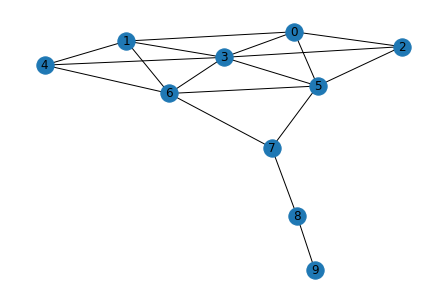

In [108]:
nx.draw(G, with_labels=True)

In [88]:
# agrega atributos a nodos y enlaces
G.add_node(1, occupation="Estudiante")
G.add_edge(1,2, weight="5") # creating a weighted network

In [89]:
#Atajo para crear enlaces con pesos
G.add_weighted_edges_from([(1, 2, 10), (1, 3, 1.30)])

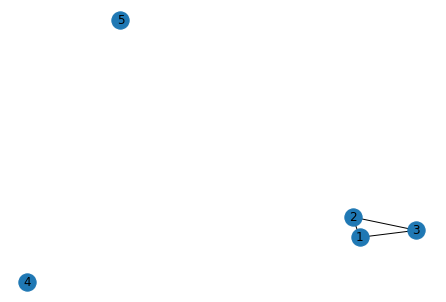

In [90]:
nx.draw(G, with_labels=True)

In [91]:
# Estábamos trabajando con una red no dirigida. Intentemos crear una versión dirigida.
DiG= nx.DiGraph()#Base class for directed graphs.
DiG.add_nodes_from([1, 2, 3, 4, 5])

DiG.add_edges_from([(1, 2), (2, 1), (2, 3), (1,3), (1,4), (1,5), (3,5)])

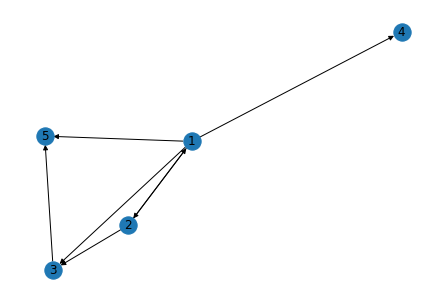

In [92]:
nx.draw(DiG, with_labels=True)

In [93]:
DiG.number_of_nodes()

5

In [94]:
DiG.number_of_edges() # ahora observe que 1,2 y 2,1 se cuentan dos veces, ya que este es un grafo dirigido.

7

In [95]:
# otro atajo entre redes dirigidas y no-dirigidas
DirectedG = G.to_directed()
UndirectedG = DiG.to_undirected()

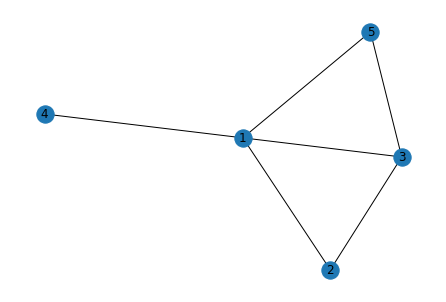

In [96]:
nx.draw(UndirectedG, with_labels=True)


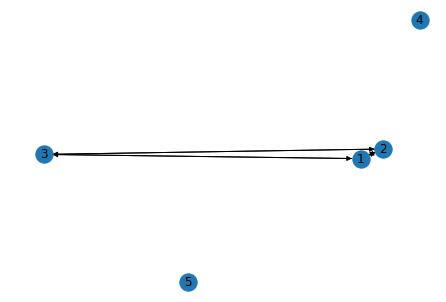

In [97]:
nx.draw(DirectedG, with_labels=True)

# Estadísticas descriptivas para una red en múltiples niveles (ego, díada, tríada, subgrupo, red)

In [98]:
# Let's load a well-known dataset, Krackkite graph (use nx. for existing datasets)
G = nx.krackhardt_kite_graph()

Nota: En teoría de grafos, el grafo de cometas de Krackhardt es un grafo simple con diez nodos. El grafo lleva el nombre de David Krackhardt, un investigador de la teoría de redes sociales.

Krackhardt introdujo el grafo en 1990 para distinguir diferentes conceptos de centralidad. Tiene la propiedad de que el vértice con grado máximo (etiquetado 3 en la figura, con grado 6), el vértice con centralidad máxima de intermediación (etiquetado 7) y los dos vértices con centralidad máxima de proximidad (etiquetado 5 y 6) son todos diferentes unos de otros.

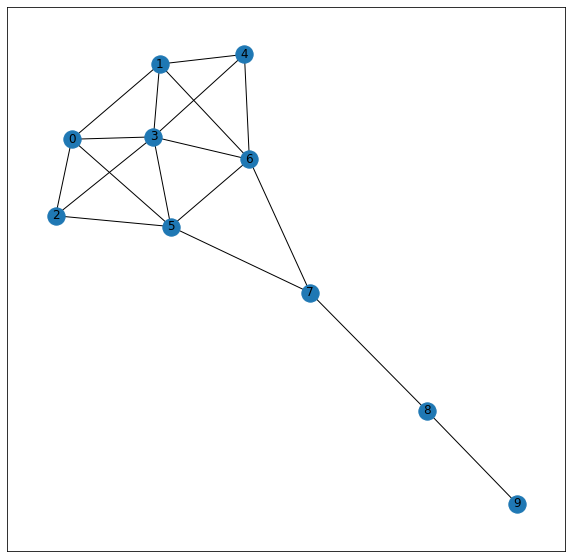

In [100]:
plt.figure(figsize =(10, 10)) 
nx.draw_networkx(G)

# Análisis a nivel de nodo

# Centralidad

Los índices de centralidad son respuestas a la pregunta "¿Qué caracteriza a un nodo importante?"
La palabra "importancia" tiene un gran número de significados, lo que lleva a muchas definiciones diferentes de centralidad.



Calcularemos (1) centralidad de grado, (2) centralidad de intermediación, (3) centralidad de proximidad, (4) centralidad de vector propio y las relaciones entre ellos.

In [ ]:
# degree.items()

In [ ]:
# list(reversed(sorted(degree.items(), key=lambda x: x[1])))

## Centralidad de grado

Si importancia significa: 

Que tan popular eres?
Cuantas personas cononces?

también puede calcularse sin normalizar, dependiendo de la pregunta que se quiera responder.

<img src="img/deg_cen.png" alt="Drawing" style="width: 600px;"/>


###### `nx.degree_centrality(G)`


In [101]:
#degree centrality (cuántas conocen / cuántas personas pueden conocer)
degree = nx.degree_centrality(G) 
print(degree)
[print('El nodo ',nodo," tiene centralidad: ",centralidad) for (nodo, centralidad) in reversed(sorted(degree.items(), key=lambda x: x[1]))]


{0: 0.4444444444444444, 1: 0.4444444444444444, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 0.3333333333333333, 5: 0.5555555555555556, 6: 0.5555555555555556, 7: 0.3333333333333333, 8: 0.2222222222222222, 9: 0.1111111111111111}
El nodo  3  tiene centralidad:  0.6666666666666666
El nodo  6  tiene centralidad:  0.5555555555555556
El nodo  5  tiene centralidad:  0.5555555555555556
El nodo  1  tiene centralidad:  0.4444444444444444
El nodo  0  tiene centralidad:  0.4444444444444444
El nodo  7  tiene centralidad:  0.3333333333333333
El nodo  4  tiene centralidad:  0.3333333333333333
El nodo  2  tiene centralidad:  0.3333333333333333
El nodo  8  tiene centralidad:  0.2222222222222222
El nodo  9  tiene centralidad:  0.1111111111111111


[None, None, None, None, None, None, None, None, None, None]

Nota: Una lambda es una función anónima a menudo se usa en funciones como `sorted()` que toman un invocable como parámetro (a menudo el parámetro de palabra clave `key`). También puede proporcionar una función existente en lugar de una lambda, siempre que sea un objeto invocable.

Nota: Un objeto invocable es un objeto que le permite usar paréntesis redondos () y eventualmente pasar algunos parámetros, al igual que las funciones.

In [102]:
[print('El feature ',feature," tiene importancia: ",importancia) for (feature, importancia) in reversed(sorted(enumerate(importance), key=lambda x: x[1]))]


NameError: name 'importance' is not defined

# Betweenness Centrality 

* Si importancia significa:

* Capacidad de intermediación entre grupos.

* Probabilidad de que la información que se origina en cualquier lugar de la red te alcance


<img src="img/bet1.png" alt="Drawing" style="width: 900px;"/>

* $d_{jk}$ el número de caminos mas cortos que pasan entre los nodos $j$ y $k$.
* $d_{jk}(i)$ número de caminos mas cortos entre j y k que pasan por el nodo $i$.
###### `nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)`

In [104]:
## Betweenness centrality: ¿Con qué frecuencia un nodo está en el camino más corto entre otros 2 nodos?
# (con qué frecuencia nos encontramos con Alice en nuestro camino para llegar a otros)

between = nx.betweenness_centrality(G, normalized = True, endpoints = False) # normalize betweenness centrality when values get large 

[print(key,":",value) for (key, value) in reversed(sorted(between.items(), key=lambda x: x[1]))]


7 : 0.38888888888888884
6 : 0.23148148148148148
5 : 0.23148148148148148
8 : 0.2222222222222222
3 : 0.10185185185185183
1 : 0.023148148148148143
0 : 0.023148148148148143
9 : 0.0
4 : 0.0
2 : 0.0


[None, None, None, None, None, None, None, None, None, None]

# Closeness centrality

* Si importancia significa:

* Estar cerca de todos los nodos


<img src="img/colss.png" alt="Drawing" style="width: 600px;"/>

* $d_{ij}$ es la distancia entre los nodos $i$ y $j$.

##### `nx.closeness_centrality(G, u=None, distance=None, normalized=True)`

In [109]:
## Closeness centrality: qué tan accesible es alguien para el resto de la red (networkx usa la distancia *inward* a un nodo, no hacia outward. Para usar la distancia outward, use `G.reverse())
closeness = nx.closeness_centrality(G)  
[print(key," : ",value) for (key, value) in reversed(sorted(closeness.items(), key=lambda x: x[1]))]#ordena en funcion del element en la segunda posicion (1)


6  :  0.6428571428571429
5  :  0.6428571428571429
7  :  0.6
3  :  0.6
1  :  0.5294117647058824
0  :  0.5294117647058824
4  :  0.5
2  :  0.5
8  :  0.42857142857142855
9  :  0.3103448275862069


[None, None, None, None, None, None, None, None, None, None]

# Eigenvector centrality

* Si importancia significa:

* Estar conectado a nodos importantes


<img src="img/eigen1.png" alt="Drawing" style="width: 600px;"/>

* $\lambda$ es el valor propio.
* La solución (cuando existe) da la centralidad del nodo. Tomamos el mas alto $\lambda$.

* Este concepto es el núcleo del algoritmo de clasificación de Google.


###### `nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight='weight')`

In [110]:
## Eigenvector centrality: alguien es tan importante en la medida en que el vecino de ese alguien es importante
eigenvector = nx.eigenvector_centrality(G) # eigenvector centrality
[print(key," : ",value) for (key, value) in reversed(sorted(eigenvector.items(), key=lambda x: x[1]))]


3  :  0.4810204881221006
6  :  0.3976910106255469
5  :  0.3976910106255469
1  :  0.35220898139203594
0  :  0.35220898139203594
4  :  0.2858347353163241
2  :  0.2858347353163241
7  :  0.19586185175360382
8  :  0.04807477501420294
9  :  0.011164058575824238


[None, None, None, None, None, None, None, None, None, None]

# Resumen

<img src="img/Centrality.png" alt="Drawing" style="width: 400px;"/>


### Ejemplo del mundo real: la red de familias de élite florentinas del siglo XIV


# Ejemplo

* Prestigio de las familias florentinas durante el Renacimiento.

<img src="img/fami.png" alt="Drawing" style="width: 400px;"/>


<img src="img/fami_1.png" alt="Drawing" style="width: 800px;"/>


In [111]:
G2=nx.florentine_families_graph()

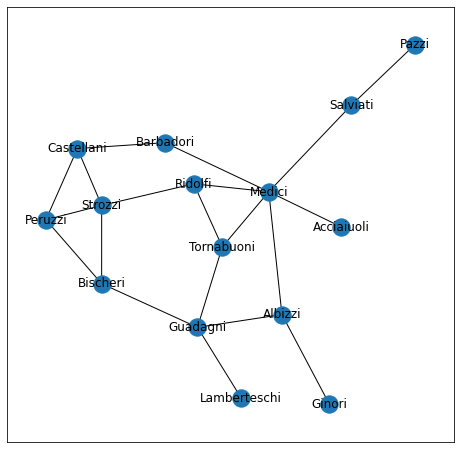

In [113]:
plt.figure(figsize =(8, 8)) 
nx.draw_networkx(G2)

# TAREA 2.1 (1 semana)

P: ¿Quiénes son las 3 familias principales en términos de:
1. ¿Centralidad de grado?
2. ¿Centralidad de intermediación?
3. ¿Centralidad de cercanía?
4. ¿Centralidad del vector propio?

Una matriz que muestra las relaciones entre las medidas de centralidad:
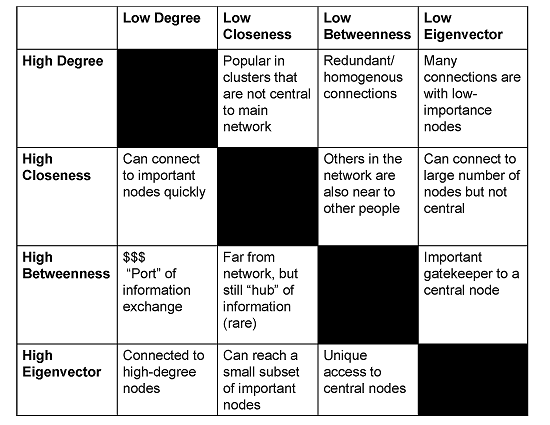

## PageRank
Redes dirigidas.

El algoritmo del billón de dólares, PageRank, funciona contando el número y la importancia de los enlaces a una página para determinar una estimación aproximada de la importancia del sitio web. **El algoritmo asigna un valor de importancia a cada página web en función del número y la calidad de los enlaces a la página**. La suposición subyacente es que es probable que los sitios web más importantes reciban más enlaces de otros sitios web. Fue desarrollado por los fundadores de Google, Larry Page y Sergey Brin. 

<img src="img/pagerank.png" width="700" height="400">

<img src="img/pgr1.jpeg" width="400" height="160">


Node: F, PageRank: 0.2329773721880849
Node: A, PageRank: 0.1721303892141963
Node: E, PageRank: 0.15416106912747013
Node: B, PageRank: 0.12287387024080189
Node: D, PageRank: 0.12287387024080189
Node: C, PageRank: 0.10193997532982814
Node: G, PageRank: 0.09304345365881689


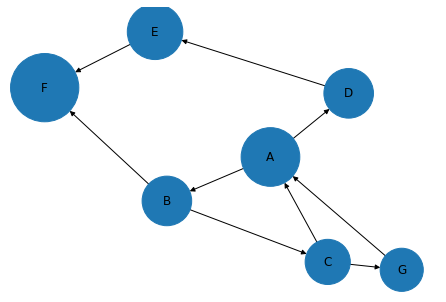

In [5]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir bordes (estos también añaden nodos)
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'A')
G.add_edge('A', 'D')
G.add_edge('D', 'E')
G.add_edge('E', 'F')
G.add_edge('B', 'F')
G.add_edge('C', 'G')
G.add_edge('G', 'A')

# Aplicar el algoritmo PageRank
pagerank = nx.pagerank(G, alpha=0.85)

# Ordenar los valores de PageRank de mayor a menor
pagerank_sorted = sorted(pagerank.items(), key=lambda item: item[1], reverse=True)

# Imprimir los valores de PageRank ordenados
for node, pagerank_value in pagerank_sorted:
    print(f"Node: {node}, PageRank: {pagerank_value}")

# Crear una lista de tamaños para los nodos basada en los valores de PageRank
sizes = [pagerank[node] * 20000 for node in G.nodes]

# Dibujar la red
nx.draw(G, with_labels=True, node_size=sizes)

# Mostrar la red
plt.show()

# Análisis a nivel de díadas: recuentos de díadas, caminos, geodésicas

In [114]:
## El número de diadas (same as calculating number of edges)
# For undirected networks: N(N-1)/2
# For directed networks: N(N-1)
G2.number_of_edges()

20

In [115]:
G2.nodes # lookup of the nodenames

NodeView(('Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi'))

In [116]:
G2.number_of_edges('Medici','Peruzzi') # comprueba si hay un enlace entre dos nodos

0

In [117]:
nx.has_path(G2,'Medici','Peruzzi') # comprobar si existe ruta entre los nodos Medici y Peruzzi

True

In [121]:
# Lista de todos los caminos posibles entre Medici y Peruzzi
paths = nx.all_simple_paths(G2, source='Medici', target='Peruzzi', cutoff=3) 
# cutoff fija el corte para la longitud de el manimo menor o igual que el valor dado (3)

print(list(paths))

[['Medici', 'Barbadori', 'Castellani', 'Peruzzi'], ['Medici', 'Ridolfi', 'Strozzi', 'Peruzzi']]


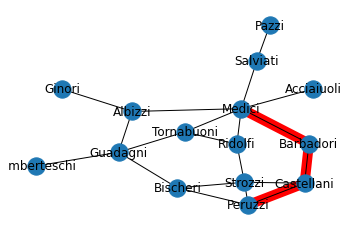

In [122]:
nx.shortest_path(G2,'Medici','Peruzzi') # encuentra una ruta geodésica

#Visualiza el camino mas corto
geodesic = nx.shortest_path(G2,'Medici','Peruzzi')
layout = nx.spring_layout(G2)
edges = [(geodesic[i], geodesic[i+1]) for i in range(len(geodesic) - 1)]
nx.draw_networkx_edges(G2, layout, edgelist = edges, edge_color="r", width=10)
nx.draw(G2, layout, with_labels=True)

In [123]:
geodesic

['Medici', 'Barbadori', 'Castellani', 'Peruzzi']

In [124]:
# Que tan similares son los vecinos de los 2 nodos
list(nx.common_neighbors(G2,'Medici', 'Ginori'))

['Albizzi']

## Trabajemos en una red real

La red de colaboración Arxiv GR-QC (Relatividad General y Cosmología Cuántica) es de e-print arXiv y cubre las colaboraciones científicas entre los artículos de los autores enviados a la categoría de Relatividad General y Cosmología Cuántica. Si un autor $i$ es coautor de un artículo con el autor $j$, el grafo contiene un enlace no dirigido entre $i$ y $j$. Si el artículo es co-autoreado por $k$ autores, esto genera un (sub) grafo completamente conectado con $k$ nodos.

fuente: http://snap.stanford.edu/data/index.html#canets

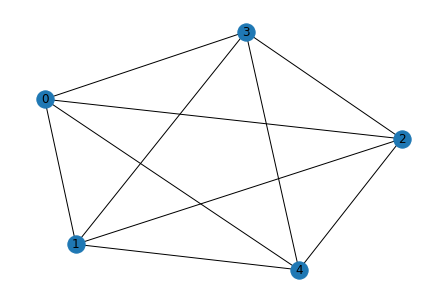

In [125]:
# Si seis autores escribieron un artículo juntos, tendrán un grafo completo
nx.draw(nx.complete_graph(5),with_labels=True)

In [126]:
# crear un grafo de autor a partir del conjunto de datos
import csv
authors_graph = nx.Graph()

with open('CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

In [127]:
type(authors_graph)

networkx.classes.graph.Graph

In [128]:
print(authors_graph.number_of_edges())
print(authors_graph.number_of_nodes())

14496
5242


In [129]:
authors_graph.nodes()

NodeView(('3466', '937', '5233', '8579', '10310', '15931', '17038', '18720', '19607', '1854', '4583', '9572', '10841', '13056', '14982', '16310', '19640', '23855', '24372', '24814', '5052', '899', '1796', '2287', '3096', '3386', '4472', '5346', '5740', '6094', '6376', '9124', '10235', '10427', '10597', '15159', '16148', '16741', '18235', '18549', '19297', '20511', '20595', '20613', '24371', '24559', '24731', '25102', '25271', '25396', '1658', '4822', '6864', '7689', '7926', '10268', '12971', '18600', '20421', '20886', '21048', '22393', '23186', '23214', '23298', '23945', '24939', '339', '624', '3731', '4743', '5407', '6610', '6700', '8045', '9099', '9639', '9785', '12141', '15184', '15784', '18719', '19870', '20532', '22527', '23576', '23577', '23649', '24199', '24293', '25201', '10243', '6774', '8049', '8053', '8517', '11964', '15538', '16694', '18648', '19423', '21012', '22457', '22691', '23452', '16174', '16470', '17822', '14265', '392', '2485', '2949', '3173', '3441', '3593', '3853

In [131]:
(authors_graph['3466'])

AtlasView({'937': {}, '5233': {}, '8579': {}, '10310': {}, '15931': {}, '17038': {}, '18720': {}, '19607': {}})

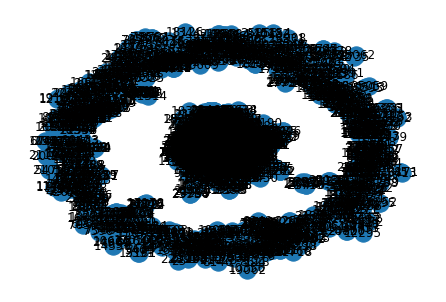

In [132]:
nx.draw(authors_graph,with_labels=True)

#### ¿Podemos encontrar al investigador más influyente/importante en esta red?

##### ¿Cómo evaluamos la importancia de algunas personas en una red?

Dentro de una red social, habrá determinadas personas que desempeñen determinadas funciones importantes. Por ejemplo, puede haber personas hiperconectadas que estén conectadas con muchas, muchas más personas. Ellas serán claves para la difusión de información. Alternativamente, si se tratara de una red de contactos de enfermedades, identificarlos sería útil para detener la propagación de enfermedades. 

#### ¿Cómo se identificaría a estas personas?

# Tarea 2.2 (3 clases)

Cree una lista de tuplas (nodo, grado de nodo) y busque el nodo con el grado máximo.

grado de nodo = número de vecinos

Repita el ejercicio para todas mas métricas de centralidad vistas en este notebook.

El grado de un nodo se traduce en grado de centralidad (que es una versión normalizada de grado)

In [ ]:
nx.degree_centrality(authors_graph)

# Tarea 2.3 (3 clases)


Trace un histograma de centralidad de grado y grado de author_graph.

Sugerencia: `plt.hist(list_of_values)` trazará un histograma

(count vs centralidad grado)

Repita el ejercicio para todas mas métricas de centralidad vistas en este notebook.

Interprte sus resultados.

#### Echemos un vistazo a los componentes conectados de un grafo.

En la teoría de grafos, un componente conectado (o simplemente un componente) de un grafo **no dirigido** es un subgrafo en el que dos vértices cualesquiera están conectados entre sí por caminos, y que no está conectado a ningún vértice adicional en el supergrafo.

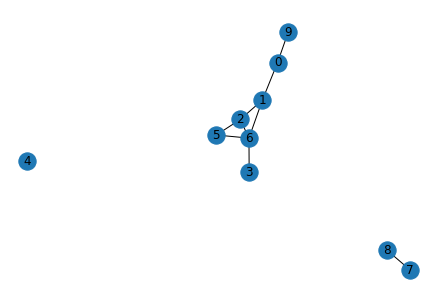

In [133]:
G = nx.erdos_renyi_graph(n=10, p=0.15, seed=1)
nx.draw(G, with_labels=True)

In [134]:
print([len(c) for c in sorted(nx.connected_components(authors_graph),
                              key=len, reverse=True)])


[4158, 14, 12, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

Nota: la función sorted () tiene un parámetro opcional llamado `key` que toma una función como su valor. Esta función `key` transforma cada elemento antes de ordenar, toma el valor y se usa dentro de `sorted` en lugar del valor original.

In [135]:
# Guardamos subgrafos en una lista
graphs = [authors_graph.subgraph(c).copy() for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)]


In [136]:
len(graphs[0])

4158

##### Camino más corto de la red

In [137]:
print(nx.shortest_path(graphs[0], '22504', '23991'))#camino entre a y b.

print(len(nx.shortest_path(graphs[0], '22504', '23991')))#distancia en nodos (incluye ppio y fin)
print(nx.shortest_path_length(graphs[0], '22504', '23991'))#distancia en enlaces (#nodos-1)

['22504', '6512', '18757', '2710', '3677', '23991']
6
5


In [ ]:
# help(nx.shortest_path)

### Plot redes con nodos de distinto tamaño

In [138]:
g = graphs[1]# ejemplo
pos=pos = nx.spring_layout(g) # Layout para la red (coordenadas de los nodos y enlaces)

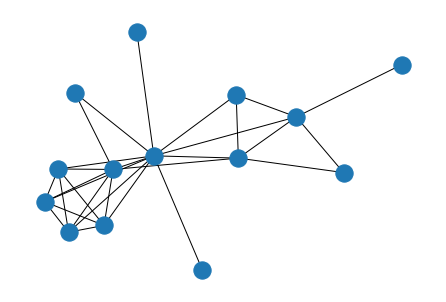

In [139]:
nx.draw(g,pos)

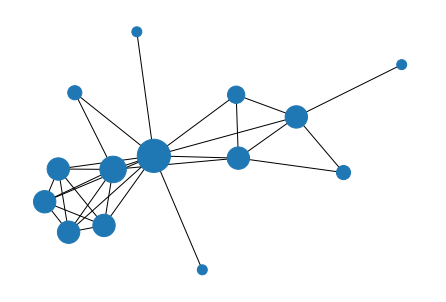

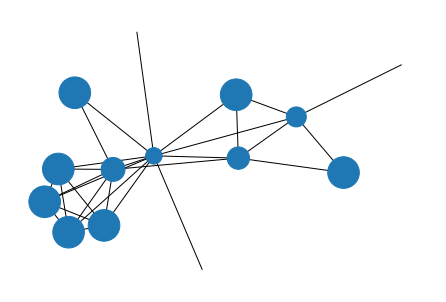

In [143]:
#Codigo para el tamaño del nodo
# g = graphs[0]# ejemplo
# pos=pos = nx.spring_layout(g) # Layout para la red (coordenadas de los nodos y enlaces)


degree_g = dict(nx.degree(g))
clustering_g=dict(nx.clustering(g))

nx.draw(g,pos, nodelist=degree_g.keys(), node_size=[v*100 for v in degree_g.values()])
plt.show()


nx.draw(g, pos,nodelist=clustering_g.keys(), node_size=[v *1000 for v in clustering_g.values()])
plt.show()

# nx.draw(g,pos, nodelist=list(degree_g.keys()), node_size=[v**(1/2) for v in degree_g.values()])
# plt.show()


### Grado de nodo vs coeficiente de clustering

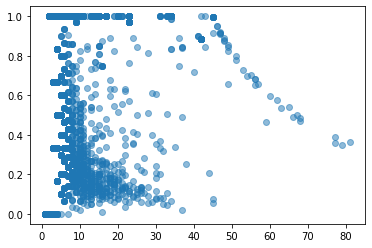

In [145]:
degree_g = dict(nx.degree(graphs[0]))
clustering_g=dict(nx.clustering(graphs[0]))

x = degree_g.values()
y = clustering_g.values()


# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()


# MUNDO PEQUEÑO
##### Seis grados de separación, número de Erdos, número de Bacon !!



<img src="img/im1.png" width="800" height="400">

<img src="img/smallw1.png" width="800" height="400">

<img src="img/smallw2.png" width="800" height="400">
<img src="img/smallw3.png" width="800" height="400">


<a href="https://oracleofbacon.org">https://oracleofbacon.org</a>





<img src="img/im2.png" width="800" height="400">

<img src="img/erdos1.png" width="800" height="400">


<a href="https://www.csauthors.net/">https://www.csauthors.net/</a>

# Tarea 2.4 (3 clases)

Encuentre el "número" del autor '22504' del grafo `author_graph`, si no hay conexión entre los nodos, asignele el número '-1'.
También trace un histograma del "número" autor '22504'.

Encuentre la longitud de ruta más corta promedio en el primer componente, es decir, `graphs[0]`

SUGERENCIA: `nx.shortest_path_length`

**Interprete sus resultados**

In [ ]:
d = {}
for node in authors_graph.nodes():#para cada nodo
    try:
        #calcula la longitud del camino mas corto entre node y `22504`
        d[node] = nx.shortest_path_length(graphs[0], '22504', node) #21012;22504
    except:
        #si arroja error (no hay camino) asinga un -1.
        next

In [ ]:
# d

In [ ]:
plt.hist(list(d.values()))
plt.show()

In [ ]:
# Calcule el promedio de la longitud de los caminos más cortos de todo el grafo aca:

np.mean(list(d.values()))

# Cambiemos de tema y hablemos de Juego de tronos (Network of Thrones)

¿Es sorprendente verdad? ¿Cuál es la relación entre un programa de televisión / novela de fatansia y la ciencia de redes o Python?

Si no has oído hablar de Game of Thrones, entonces debes ser muy bueno para aislarte. Game of Thrones es la popular serie de televisión de HBO basada en la (también) popular serie de libros "A Song of Ice and Fire" de George R.R. Martin. 

Ahora, analizaremos la red de co-ocurrencia de los personajes en los libros de Juego de Tronos. Aquí, se considera que dos personajes coexisten si sus nombres aparecen en hasta a 15 palabras de distancia entre sí en los libros.

<!-- ![](img/got.png) -->

<img src="img/got.png" width="800" height="400">


In [ ]:
# !conda install --yes --prefix {sys.prefix} community # 

# # !conda install --yes --prefix {sys.prefix} python-louvain # 

# !pip install python-louvain


In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
# import community
from community import community_louvain
import numpy as np


%matplotlib inline

### Cargamos los datasets

In [5]:
book1 = pd.read_csv('data/asoiaf-book1-edges.csv')
book2 = pd.read_csv('data/asoiaf-book2-edges.csv')
book3 = pd.read_csv('data/asoiaf-book3-edges.csv')
book4 = pd.read_csv('data/asoiaf-book4-edges.csv')
book5 = pd.read_csv('data/asoiaf-book5-edges.csv')

El DataFrame resultante `book1` tiene 5 columnas: origen, destino, tipo, peso y libro. El origen y el destino son los dos nodos que están vinculados por un enlace. Una red puede tener enlaces dirigidos o no dirigidos y en esta red todos los enlaces no están dirigidos. El atributo de peso de cada enlace nos dice el número de interacciones que los personajes han tenido sobre el libro, y la columna del libro nos dice el número del libro.

In [6]:
# book1.head()
book1.sort_values('weight',ascending=False).head()

,Source,Target,Type,weight,book
329,Eddard-Stark,Robert-Baratheon,Undirected,291,1
134,Bran-Stark,Robb-Stark,Undirected,112,1
62,Arya-Stark,Sansa-Stark,Undirected,104,1
249,Daenerys-Targaryen,Drogo,Undirected,101,1
479,Joffrey-Baratheon,Sansa-Stark,Undirected,87,1


Una vez que tenemos los datos cargados como un DataFrame de pandas, es hora de crear una red. Creamos un grafo para cada libro. Es posible crear un MultiGraph en lugar de 5 grafos, pero es más fácil jugar con diferentes gráficos.

In [7]:
G_book1 = nx.Graph()
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

Completemos el grafo con los enlaces del DataFrame de pandas.

In [8]:
for row in book1.iterrows(): #Itera las filas de DataFrame como pares (index, series).
    G_book1.add_edge(row[1]['Source'], row[1]['Target'],weight=row[1]['weight'], book=row[1]['book'])

In [9]:
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

In [12]:
books = [G_book1, G_book2, G_book3, G_book4, G_book5]

Echemos un vistazo a estos enlaces

In [20]:
list(G_book1.edges(data=True))[16]#data=True muestra los atributos del enlace: peso y libro en este caso

('Jaime-Lannister', 'Loras-Tyrell', {'weight': 3, 'book': 1})

In [21]:
list(G_book1.edges(data=True))[400]

('Benjen-Stark', 'Theon-Greyjoy', {'weight': 4, 'book': 1})

In [22]:
len(list(G_book1.edges()))

684

In [32]:
print(G_book1.number_of_edges())
print(G_book1.number_of_nodes())

684
187


### Encontrar el nodo/personaje más importante en estas redes.

¿Es Jon Snow, Tyrion, Daenerys o alguien más? ¡Vamos a ver! Network Science nos ofrece muchas métricas diferentes para medir la importancia de un nodo en una red como vimos en la primera parte del taller. 

**Tenga en cuenta que no existe una forma "correcta" de calcular el nodo más importante de una red, cada métrica tiene un significado diferente.**

Primero, midamos la importancia de un nodo en una red observando la cantidad de vecinos que tiene, es decir, la cantidad de nodos a los que está conectado. Por ejemplo, una cuenta influyente en Twitter, donde la relación seguidor-seguidor forma la red, es una cuenta que tiene un alto número de seguidores. Esta medida de importancia se llama centralidad de grado.

Usando esta medida, extraigamos los diez personajes más importantes del primer libro (libro [0]) y el quinto libro (libro [4]).

In [33]:
deg_cen_book1 = nx.degree_centrality(books[0])

In [34]:
deg_cen_book5 = nx.degree_centrality(books[4])

In [35]:
sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

In [36]:
sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]
#key recive la funcion para ordenar, lambda es la funcion "al vuelo" para ordenar

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544),
 ('Cersei-Lannister', 0.08860759493670886),
 ('Barristan-Selmy', 0.07911392405063292),
 ('Hizdahr-zo-Loraq', 0.06962025316455696),
 ('Asha-Greyjoy', 0.056962025316455694),
 ('Melisandre', 0.05379746835443038)]

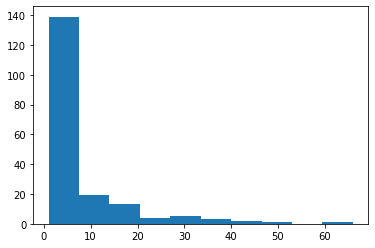

In [38]:
# Plot a histogram of degree centrality
plt.hist(list(dict(nx.degree(G_book1)).values()))

plt.show()

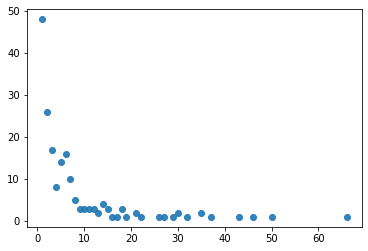

In [39]:
d= {}
for i, j in dict(nx.degree(G_book1)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = list((d.keys()))
y = list(d.values())
plt.scatter(x, y, alpha=0.9)
plt.show()

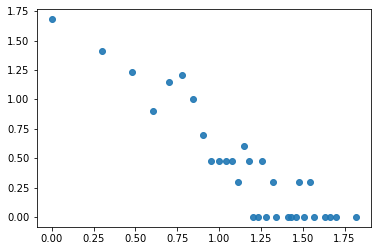

In [40]:
d = {}
for i, j in dict(nx.degree(G_book1)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log10(list((d.keys())))
y = np.log10(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

# Tarea 2.5 (2 Clases)

Cree una nueva medida de centralidad, `weighted_degree(Graph, weight)` que toma Graph y el atributo de peso y devuelve un diccionario de grados ponderados. El grado ponderado se calcula sumando el peso de todos los enlaces de un nodo. Luego, encuentre los cinco personajes más importantes de acuerdo con esta medida.

**Interprete sus resultados**

In [51]:
#Escriba su código acá (siempre pueden agregar más líneas de ser necesario):

weighted_degree= lindo código!
# print(list(nx.neighbors(G_book1,'Eddard-Stark')))


In [ ]:
# plt.hist(list(weighted_degree(G_book1, 'weight').values()))
# plt.show()

In [ ]:
d = {}
for i, j in dict(nx.degree(G_book1)).items():
#     print(i,j)
    if j in d:
        d[j] += 1 #cuenta la cantidad de veces que el mismo grado "ocurre"
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
# sorted(weighted_degree(G_book1, 'weight').items(), key=lambda x:x[1], reverse=True)[0:5]

### Hagamos esto para la centralidad de Betweenness y verifiquemos si esto hace alguna diferencia

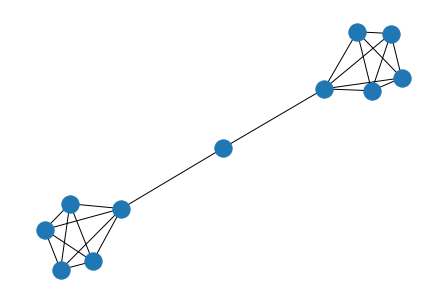

In [52]:
G = nx.barbell_graph(5, 1) #Recordemos: El nodo del centro es el de mayor betweennes
nx.draw(G)

In [53]:
# Primero verifique el grafo no ponderado, solo la estructura

sorted(nx.betweenness_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

In [54]:
# Consideremos el peso ahora

sorted(nx.betweenness_centrality(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Robert-Baratheon', 0.23341885664466297),
 ('Eddard-Stark', 0.18703429235687297),
 ('Tyrion-Lannister', 0.15311225972516293),
 ('Robb-Stark', 0.1024018949825402),
 ('Catelyn-Stark', 0.10169012330302643),
 ('Jon-Snow', 0.09027684366394043),
 ('Jaime-Lannister', 0.07745109164464009),
 ('Rodrik-Cassel', 0.07667992877670296),
 ('Drogo', 0.06894355184677767),
 ('Jorah-Mormont', 0.0627085149665795)]

In [143]:
# por defecto, el atributo de peso en el pagerank es `weight`,
# por lo que usamos `peso = None` para encontrar los resultados no ponderados
sorted(nx.pagerank(G_book1, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.04550213151218522),
 ('Tyrion-Lannister', 0.03301449867019286),
 ('Catelyn-Stark', 0.030189729639356143),
 ('Robert-Baratheon', 0.02982527420823678),
 ('Jon-Snow', 0.026840579868198603),
 ('Robb-Stark', 0.02155918676623074),
 ('Sansa-Stark', 0.019998050283349653),
 ('Bran-Stark', 0.019940543257472354),
 ('Jaime-Lannister', 0.017500555351025744),
 ('Cersei-Lannister', 0.017074603349338583)]

In [140]:
sorted(nx.pagerank(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.07236162026570049),
 ('Robert-Baratheon', 0.04849367196106829),
 ('Jon-Snow', 0.04770801150205558),
 ('Tyrion-Lannister', 0.04367631315626212),
 ('Catelyn-Stark', 0.034666613211363564),
 ('Bran-Stark', 0.02977004993932226),
 ('Robb-Stark', 0.029214217154195955),
 ('Daenerys-Targaryen', 0.027098612952214246),
 ('Sansa-Stark', 0.02694466267974004),
 ('Cersei-Lannister', 0.02162037092438613)]

### ¿Existe una correlación entre estas métricas? (2 clases)

# Tarea 2.6

Encuentre la correlación entre estas cuatro métricas de centralidad.

- Eigenvector Centrality (PageRank, no apto para redes no-dirigidas).
- betweenness_centrality
- weighted_degree
- centralidad de grado

**Inteprete sus resultados en función de como se relacionan las métricas, ej. Alto PageRank y bajo Betweenness Centrality, etc.**

In [ ]:
cor = pd.DataFrame.from_records(
    [nx.pagerank_numpy(G_book1, weight='weight'),
     nx.betweenness_centrality(G_book1, weight='weight'),
#      weighted_degree(G_book1, 'weight'),
     nx.degree_centrality(G_book1)])

In [ ]:
cor.T.corr()

## Evolución de la importancia de los personajes sobre los libros

Según la centralidad de grado, el personaje más importante del primer libro es Eddard Stark, pero ni siquiera está en el top 10 del quinto libro. La importancia cambia en el transcurso de cinco libros (hay muchas muertes :B)

Veamos la evolución de la centralidad de grado de un par de personajes como Eddard Stark, Jon Snow, Tyrion, que aparecieron en el top 10 de centralidad de grado en el primer libro.

Creamos un DataFrame con columnas de personajes y los libros como índices donde cada entrada es la centralidad de grado del personaje en ese libro en particular y trazamos la evolución de la centralidad de grado para Eddard Stark, Jon Snow y Tyrion.

Podemos ver que la importancia de Eddard Stark en la red diminuye y con Jon Snow hay una caída en el cuarto libro pero un aumento repentino en el quinto libro.

In [64]:
evol = [nx.degree_centrality(book) for book in books]#para cada red calcula el grado de nodo

evol_df = pd.DataFrame.from_records(evol).fillna(0)#Crea un objeto DataFrame a partir de un ndarray estructurado, una secuencia de tuplas o diccionarios, o un DataFrame.
evol_df

,Addam-Marbrand,Jaime-Lannister,Tywin-Lannister,Aegon-I-Targaryen,Daenerys-Targaryen,Eddard-Stark,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Bowen-Marsh,Chett,...,Yellow-Dick,Walda-Frey-(daughter-of-Merrett),Roose-Ryswell,Scar,Shrouded-Lord,Theomore,William-Foxglove,Willow-Witch-eye,Thistle,Wulfe
0,0.010753,0.155914,0.118280,0.010753,0.112903,0.354839,0.037634,0.053763,0.026882,0.016129,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.081395,0.065891,0.019380,0.069767,0.085271,0.023256,0.015504,0.000000,0.003876,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.026490,0.149007,0.096026,0.009934,0.079470,0.052980,0.059603,0.023179,0.033113,0.016556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.014652,0.234432,0.058608,0.000000,0.000000,0.029304,0.025641,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.031646,0.028481,0.003165,0.183544,0.044304,0.015823,0.003165,0.028481,0.000000,...,0.009494,0.006329,0.003165,0.006329,0.003165,0.006329,0.003165,0.003165,0.003165,0.003165


<AxesSubplot:>

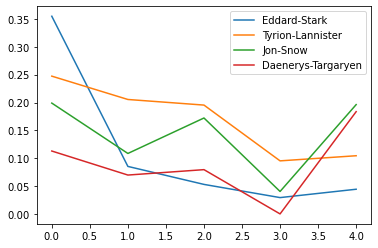

In [65]:
evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow','Daenerys-Targaryen']].plot()



#Nota: Los corchetes interiores son para la lista y los corchetes externos son operadores de indexación, es decir, 
#debe usar corchetes dobles si seleccionas dos o más columnas. Con un nombre de columna, un solo par de corchetes 
#devuelve una Series, mientras que los corchetes dobles devuelven un dataframe.

In [63]:
evol_df['Eddard-Stark']#, 'Tyrion-Lannister', 'Jon-Snow']

0    0.354839
1    0.085271
2    0.052980
3    0.029304
4    0.044304
Name: Eddard-Stark, dtype: float64

In [91]:
# Buscamos a los 3 personajes mas importantes de cada libro y creamos un arreglo con sus nombres.
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:3].index))# `|=` hace una unión de conjuntos y reasigna (junta los 5 libros)
#     print(set_of_char)
set_of_char

# VER: https://stackoverflow.com/questions/3929278/what-does-ior-do-in-python

{'Brienne-of-Tarth',
 'Cersei-Lannister',
 'Daenerys-Targaryen',
 'Eddard-Stark',
 'Jaime-Lannister',
 'Joffrey-Baratheon',
 'Jon-Snow',
 'Robert-Baratheon',
 'Stannis-Baratheon',
 'Tyrion-Lannister'}

### Ejercicio resuelto

Trace la evolución de la centralidad de grado ponderado de los personajes antes mencionados sobre los 5 libros y repita el mismo ejercicio para la centralidad de intermediación.

Text(0, 0.5, 'Centralidad de grado')

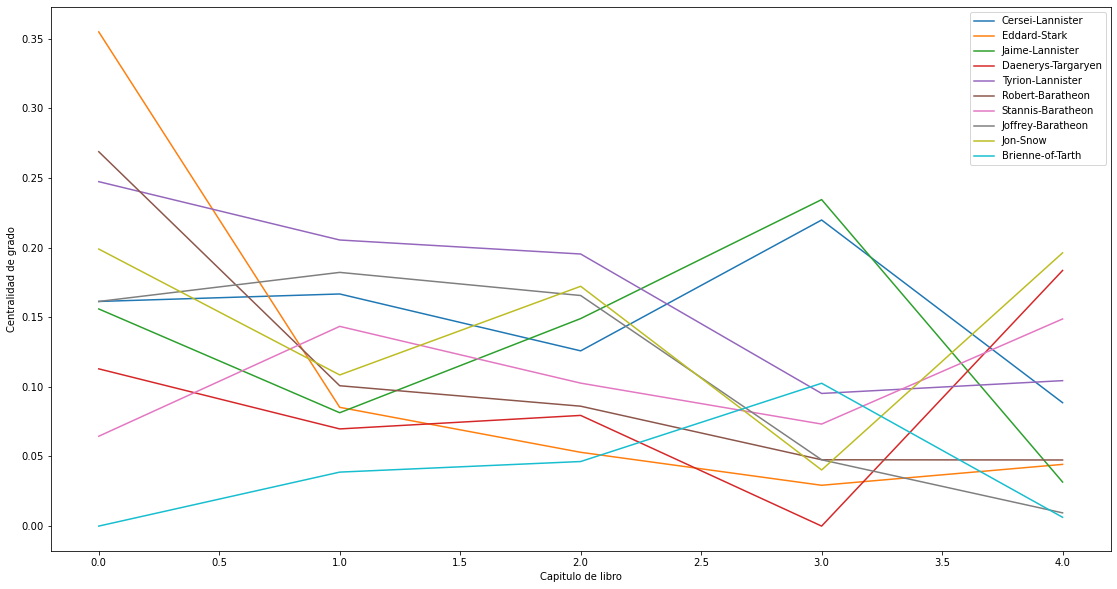

In [90]:
evol_df[list(set_of_char)].plot(figsize=(19,10))
plt.xlabel('Capitulo de libro')
plt.ylabel('Centralidad de grado')

Text(0.5, 0, 'Capitulo de libro')

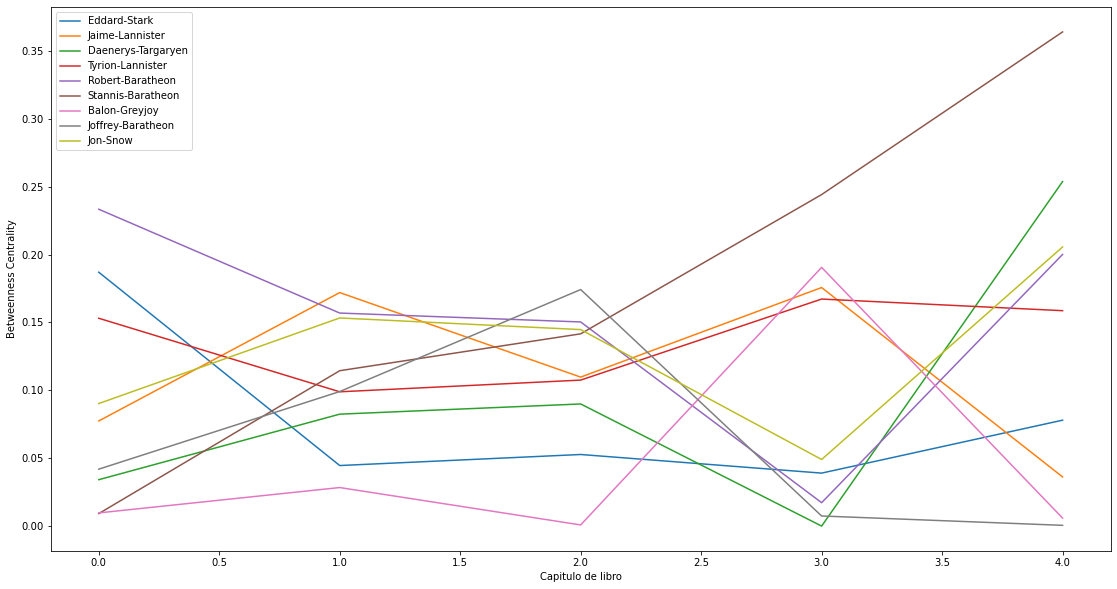

In [92]:
evol = [nx.betweenness_centrality(graph, weight='weight') for graph in [G_book1, G_book2, G_book3, G_book4, G_book5]]
evol_df = pd.DataFrame.from_records(evol).fillna(0)



set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:3].index))


evol_df[list(set_of_char)].plot(figsize=(19,10))

plt.ylabel('Betweenness Centrality')
plt.xlabel('Capitulo de libro')

### Entonces, ¿qué pasa con Stannis Baratheon?

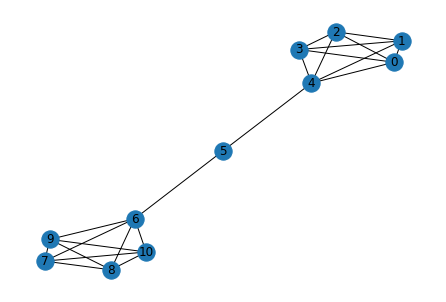

In [93]:
nx.draw(nx.barbell_graph(5, 1), with_labels=True)

In [94]:
sorted(nx.degree_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]#ordena por centralidad (con 0 ordena por el nombre)

[('Jon-Snow', 0.1962025316455696),
 ('Daenerys-Targaryen', 0.18354430379746836),
 ('Stannis-Baratheon', 0.14873417721518986),
 ('Tyrion-Lannister', 0.10443037974683544),
 ('Theon-Greyjoy', 0.10443037974683544)]

In [95]:
sorted(nx.betweenness_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

[('Stannis-Baratheon', 0.45283060689247934),
 ('Daenerys-Targaryen', 0.2959459062106149),
 ('Jon-Snow', 0.24484873673158666),
 ('Tyrion-Lannister', 0.20961613179551256),
 ('Robert-Baratheon', 0.17716906651536968)]

# Detección de comunidad en redes (Spoiler)
Se dice que una red tiene una estructura de comunidades si los nodos de la red se pueden agrupar "fácilmente" en conjuntos de nodos (potencialmente superpuestos) de modo que cada conjunto de nodos esté densamente conectado internamente (dentro de cada comunidad).

Usaremos el algoritmo de detección de la comunidad de Louvain para encontrar los módulos en nuestro grafo.

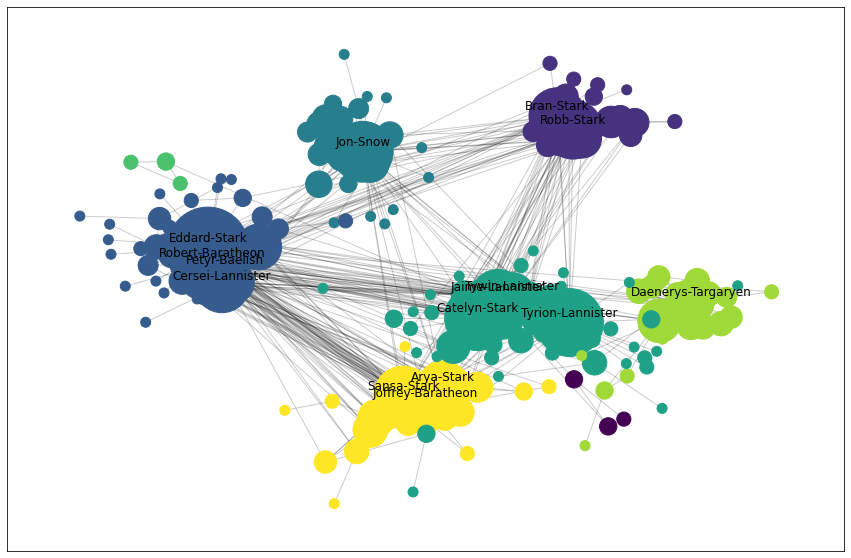

In [20]:
def draw_communities(G, partition, pos, n_labels=10):
    """Dibuja el grafo G con una coloración de los nodos de acuerdo a la partición de la comunidad proporcionada.
    
    Parámetros:
    - G: un objeto networkx.Graph
    - partition: un diccionario mapeando nombres de nodos a etiquetas de comunidad
    - pos: un diccionario mapeando nombres de nodos a posiciones en el espacio 2D
    - n_labels: la cantidad de nodos con el grado más alto para los que se mostrarán las etiquetas
    """

    # Creamos un mapa de colores
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

    # Dibujamos los nodos, coloreándolos por su comunidad y ajustando su tamaño por su grado
    nx.draw_networkx_nodes(G, pos, node_color=[cmap(partition[n]) for n in G.nodes()], 
                           node_size=[G.degree(n) * 100 for n in G.nodes()])

    # Dibujamos las aristas
    nx.draw_networkx_edges(G, pos, alpha=0.2)

    # Seleccionamos los n_labels nodos de mayor grado para etiquetar
    degree_dict = dict(G.degree(G.nodes()))
    highest_degree_nodes = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)[:n_labels]
    labels = {node[0]:node[0] for node in highest_degree_nodes}

    # Ajustamos las posiciones de las etiquetas
    label_pos = {node: (pos[node][0], pos[node][1] + 0.04) for node in labels}  # Movemos las etiquetas un poco hacia arriba
    nx.draw_networkx_labels(G, label_pos, labels=labels)


    # nx.draw_networkx_labels(G, pos, labels=labels)

    plt.show()

def community_layout(g, partition):
    """
    Calcule el diseño para una red modular. Esto mejora la separación de las comunidades.
    """

    # Crear un nuevo gráfico que esté ponderado en función de la comunidad (partición)
    inter_community_edges = [(u, v) for u, v in g.edges() if partition[u] != partition[v]]
    
    # Ponderamos las aristas inter-comunidad a 0.01 y las intra-comunidad a 1
    weights = {edge: 0.01 if edge in inter_community_edges else 1 for edge in g.edges()}
    nx.set_edge_attributes(g, weights, "weight")
    
    # Recalculamos el diseño con los pesos ajustados
    pos_communities = nx.spring_layout(g, k=0.2, weight='weight', iterations=50)

    return pos_communities





plt.figure(figsize=(15, 10))
# Uso de la función:
partition = community_louvain.best_partition(G_book1)
pos = community_layout(G_book1, partition)
draw_communities(G_book1, partition, pos, n_labels=15)  # Se etiquetan los 15 nodos de mayor grado

In [98]:
# Creamos un diccionario de personajes y sus respectivas comunidades
d = {}
for character, par in partition.items():
    if par in d:
        d[par].append(character)
    else:
        d[par] = [character]
d

{7: ['Addam-Marbrand',
  'Jaime-Lannister',
  'Tywin-Lannister',
  'Tyrion-Lannister',
  'Catelyn-Stark',
  'Rodrik-Cassel',
  'Bronn',
  'Chiggen',
  'Marillion',
  'Shae',
  'Shagga',
  'Vardis-Egen',
  'Willis-Wode',
  'Brynden-Tully',
  'Edmure-Tully',
  'Hoster-Tully',
  'Lysa-Arryn',
  'Nestor-Royce',
  'Walder-Frey',
  'Colemon',
  'Donnel-Waynwood',
  'Eon-Hunter',
  'Masha-Heddle',
  'Moreo-Tumitis',
  'Mya-Stone',
  'Mychel-Redfort',
  'Robert-Arryn',
  'Stevron-Frey',
  'Tytos-Blackwood',
  'Wendel-Manderly',
  'Chella',
  'Clement-Piper',
  'Karyl-Vance',
  'Conn',
  'Coratt',
  'Dolf',
  'Gunthor-son-of-Gurn',
  'Harys-Swyft',
  'Kevan-Lannister',
  'Jonos-Bracken',
  'Jyck',
  'Morrec',
  'Kurleket',
  'Leo-Lefford',
  'Lyn-Corbray',
  'Mord',
  'Timett',
  'Ulf-son-of-Umar'],
 1: ['Aegon-I-Targaryen',
  'Daenerys-Targaryen',
  'Aggo',
  'Drogo',
  'Jhogo',
  'Jorah-Mormont',
  'Quaro',
  'Rakharo',
  'Cohollo',
  'Haggo',
  'Qotho',
  'Doreah',
  'Eroeh',
  'Illyrio-Mopa

In [99]:
# la densidad de un grafo es una propiedad que determina la proporción de aristas que posee. 

nx.density(G_book1)

0.03933068828704502

In [100]:
nx.density(nx.subgraph(G_book1, d[4]))

1.0

In [101]:
nx.density(nx.subgraph(G_book1, d[7]))

0.08599290780141844

In [104]:
nx.density(nx.subgraph(G_book1, d[1]))#/nx.density(G_book1)

0.2813852813852814

# Tarea 2.7 (3 clases)

Encuentre el nodo más importante en cada partición/comunidad según su centralidad de grado (use la centralidad normalizada).

In [54]:
from sinfo import sinfo
sinfo()

-----
community   0.15
matplotlib  3.5.0
networkx    2.6.3
numpy       1.22.4
pandas      1.3.4
sinfo       0.3.1
-----
IPython             7.29.0
jupyter_client      7.1.0
jupyter_core        4.9.1
jupyterlab          3.2.4
notebook            6.4.6
-----
Python 3.10.0 | packaged by conda-forge | (default, Nov 20 2021, 02:25:38) [Clang 11.1.0 ]
macOS-10.15.7-x86_64-i386-64bit
16 logical CPU cores, i386
-----
Session information updated at 2023-06-16 01:06
